In [8]:
import pandas as pd 
import numpy as np
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import r2_score, mean_absolute_percentage_error

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from forecasting.get_forecasting_model import *

In [3]:
test_path = os.path.join(project_root, 'data', 'processed', 'test.csv')

df = pd.read_csv(test_path)

In [4]:
predictor = Predictor('sarimax', '15min')

In [ ]:
X, y, y_pred = predictor.get_prediction(df)

y_true = np.exp(y)
y_pred = np.exp(y_pred)

Using: cpu


In [9]:
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f'R2: {r2}')
print(f'MAPE: {mape}')

R2: 0.7581147457067352
MAPE: 0.24224828461018771


In [11]:
def load_info(data_path, model_name, interval):
    info= {}
    df= pd.read_csv(data_path)
    predictor= Predictor(model_name, interval)
    X, y_true, y_pred = predictor.get_prediction(df)

    info["X"]= X
    info["y_true"]= y_true
    info["y_pred"]= y_pred
    return info

In [13]:
info = load_info(test_path, 'sarimax', '5min')

Using: cpu


In [17]:
type(info['X']['time'])

pandas.core.series.Series

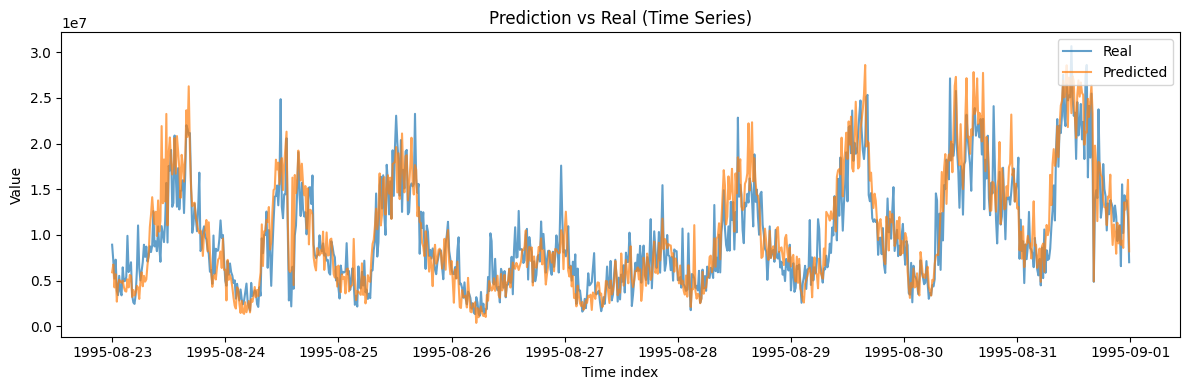

In [ ]:
t = X['time']

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(t, y_true, label="Real", alpha=0.7)
ax.plot(t, y_pred, label="Predicted", alpha=0.7)

ax.set_title("Prediction vs Real (Time Series)")
ax.set_xlabel("Time index")
ax.set_ylabel("Value")
ax.legend(loc="upper right")

fig.tight_layout()